# Streamlining your code

We will:

- extract data from CSV to create a `geopandas.GeoDataFrame`
- do more customizations fro maps and matplotlib figures
- go over strategies to streamline your code!

In [1]:
# Read in libraries
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

In [2]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Drop first column
power_plants = power_plants.drop(columns ='Unnamed: 0')

power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


In [3]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names
states.columns = states.columns.str.lower()

states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


## CSV to `geopandas.GeoDataFrame`

The power plants file is a CSV. Unlike shapefiles , `geopandas` doesnt have a way to extract a geometry column from CSV. So we need to specify this manually.

We will use longitude and latitude columns in the CSV, these indicate the location of the power plants in NAD83 CRS

In [4]:
points = gpd.points_from_xy(power_plants.longitude,
                   power_plants.latitude)

In [5]:
power_plants = gpd.GeoDataFrame(power_plants, #Data
                 geometry = points, # Specify geometry
                 crs = 'EPSG:4269') # Specify crs

<Axes: >

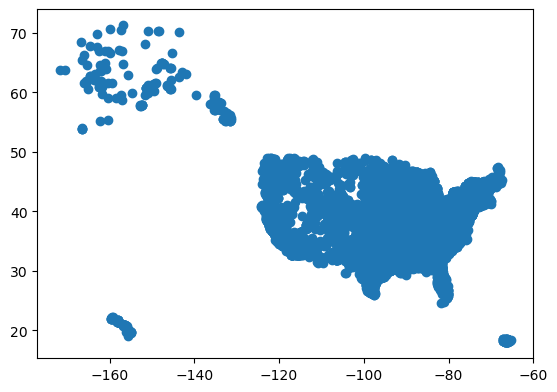

In [6]:
power_plants.plot()

## f-strings

We have printed variables using string concatenation inside `print()` function writing commas between every string and variable we want to print

In [7]:
print('CRS:', power_plants.crs)

CRS: EPSG:4269


f-strings = formated string. The simplest syntax for an f-string is:
```default
f" some text {replace}"
```

`replace` can be a variable, an expression, a function or method call


In [8]:
# Explore CRS
print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


In [9]:
print(f"{'Is the CRS geographic?': <25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?': <25} {power_plants.crs.is_projected}")

Is the CRS geographic?    True
Is the CRS projected?     False


# Explore the TIGER shapefile

Preliminary information about the states geodataframe

In [10]:
states.tail()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
51,1,1,25,00606926,25,MA,Massachusetts,00,G4000,A,20204341720,7130708927,+42.1565196,-071.4895915,"POLYGON ((-71.25515 42.73655, -71.25510 42.736..."
52,3,5,51,01779803,51,VA,Virginia,00,G4000,A,102258178227,8528072639,+37.5222512,-078.6681938,"POLYGON ((-76.49150 36.55065, -76.49388 36.550..."
53,3,5,11,01702382,11,DC,District of Columbia,00,G4000,A,158316184,18709787,+38.9042474,-077.0165167,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
54,2,4,19,01779785,19,IA,Iowa,00,G4000,A,144659596400,1086089872,+42.0700243,-093.4933473,"POLYGON ((-95.86095 43.50004, -95.85979 43.500..."
55,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294365853885,853990728,+34.2039362,-111.6063449,"POLYGON ((-110.75069 37.00301, -110.74193 37.0..."


EPSG:4269


<Axes: >

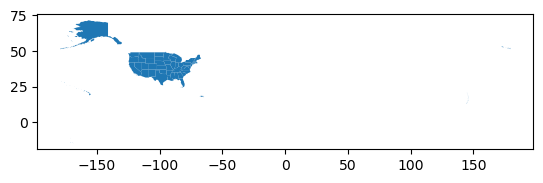

In [11]:
print(states.crs)
states.plot()

## `for` loops

It can be easier to work with codes as number instead of strings, let's update the corresponding columns in the states geo-dataframe

In [12]:
# Examine if the region, division, statefp columns are string or numeric
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"region is string dtype? {is_string_dtype(states['division'])}")
print(f"region is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
region is string dtype? True
region is string dtype? True


This coding style is inconvenient because it repeats the same piece of code, only changing the column name. 

Instead, we can use a for loop to streamline:

In [13]:
code_cols = ['region', 'division', 'statefp'] 

# Check whether does columns are strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


**DRY code**

Dry = don't repeat yourself = core programming principle that encourages reducing redundancy and consolidating repeated logic. If you need to repeat the 'same' code more than twice, you probably need a for loop.

## `assert`

The `assert` keyword does nothing if the expression next to it evaluates to `True` and it raises an `AssertionError` exception and stops your code from running further if not 

We use it to integrate tests into our code

In [14]:
# Does nothing if statement is True
assert 2+2 == 4

# Raise an error if statement is False
assert 3+3 == 2

AssertionError: 

A workflow for updating the data type of code columns to be integers: 

for each column in code_columns
    convert column to numeric
    check if column is numeric using assert


In [15]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])

In [16]:
states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

## Data selection

For the lesson we want to use only data for the contiguous states. The data covers a bigger extension:


<Axes: >

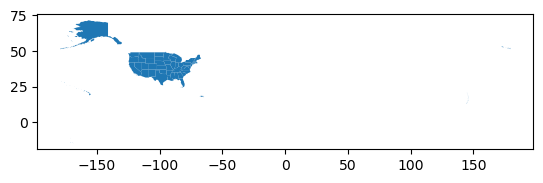

In [17]:
states.plot()

## Check-in

1. What are the unique values for region, division, or state codes in the data?
2. Which codes should we select to only keep dates in the contigous US? 

In [22]:
print(states['region'].unique())
print(states['division'].unique())
print(states['statefp'].unique())

[3 2 1 4 9]
[5 3 4 1 8 9 2 7 6 0]
[54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]


<Axes: >

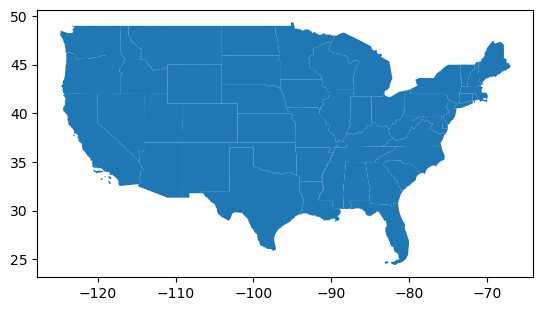

In [25]:
# Remove region 9 or division 0
contiguous = states[(states.region != 9) & (~states.statefp.isin([2, 15]))]
contiguous.plot()

The `~` tilde symbol is used in Python to negate the statement. 

## Check-in
Select the data in the power plants data frame for the contiguous US states. 

In [30]:
power_plants['state'].unique()

array(['Alaska', 'Alabama', 'Texas', 'Minnesota', 'California',
       'Kentucky', 'Nebraska', 'New York', 'Washington', 'Arizona',
       'Kansas', 'South Carolina', 'Florida', 'Nevada', 'Utah',
       'Oklahoma', 'Arkansas', 'Illinois', 'Colorado', 'Wyoming',
       'Connecticut', 'Massachusetts', 'New Mexico', 'Vermont',
       'Delaware', 'Maryland', 'Georgia', 'Missouri', 'Hawaii', 'Idaho',
       'Maine', 'Indiana', 'North Carolina', 'Iowa', 'Louisiana',
       'Michigan', 'Wisconsin', 'Mississippi', 'Montana', 'New Hampshire',
       'New Jersey', 'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Dakota', 'Tennessee', 'Virginia',
       'West Virginia', nan, '994.4', 'District of Columbia',
       'Puerto Rico'], dtype=object)

In [ ]:
power_plants[(power_plants['state'] != 'Alaska') | (power_plants['state'] != 'Hawaii') | (power_plants['state'] != 'nan') | (power_plants['state'] != '994.4')] 

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12004,23573,66723,Sawtell Solar,65736,"Sawtell Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 3 MW,Solar Photovoltaic,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-82.375953,35.380139,POINT (-82.37595 35.38014)
12005,23574,66724,Southwick Solar,65737,"Southwick Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 3 MW,Solar Photovoltaic,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-79.367698,36.009321,POINT (-79.36770 36.00932)
12006,23575,66725,Whiskey Solar,65738,"Whiskey Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 5 MW,Solar Photovoltaic,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-79.736312,35.273434,POINT (-79.73631 35.27343)
12007,23576,66729,(3K) 59 Hetcheltown Rd,64872,"Distributed Solar Development, LLC",IPP Non-CHP,NaN,NaN,NaN,New York,NaN,solar,Solar = 1.4 MW,Solar Photovoltaic,1.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-73.910480,42.876570,POINT (-73.91048 42.87657)


In [ ]:
# remove data not in the contiguous states
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska', 'nan', '994.4'])]

In [38]:
contiguous.crs == power_plants.crs

True

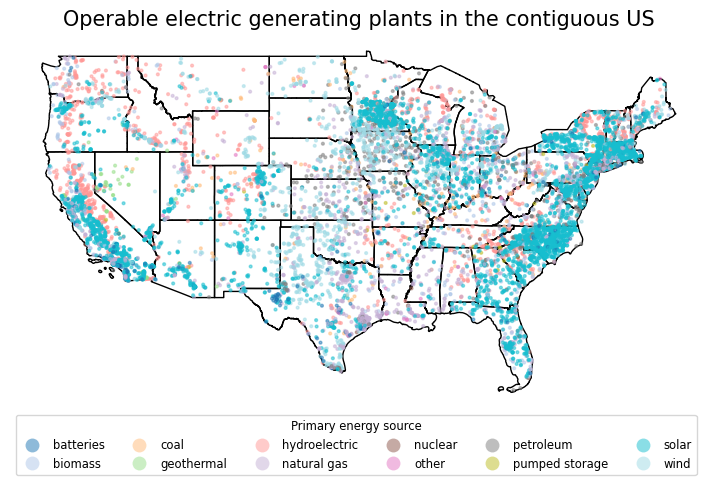

In [41]:
fig, ax = plt.subplots(figsize = (9,5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis('off')

# Title 
ax.set_title('Operable electric generating plants in the contiguous US',
             fontsize = 15)

# Add states
contiguous.plot(ax=ax,
                color = 'none')

# Add power plant colors by energy source 
power_plants.plot(ax=ax,
                  column = 'primsource',
                  legend = True,
                  markersize=4,
                  cmap = 'tab20',
                  alpha = 0.5,
                  legend_kwds = {
                      'title':'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize' : 'small',
                      'loc' : 'upper left',
                      'bbox_to_anchor' : (0,0),
                      'ncol' : 6
                  })

plt.show()

## `for` with `zip`

Often we need to iterate simulataneously over two lists (or iterables).

`zip()` is a Python function that allows you to combine two lists so that you can iterate over their elements in pairs. When used in the `for` loop it allow you to process elements of each list together.

In [42]:
# Itrate over a single list
numbers = [1, 2, 3]
for num in numbers:
    print(num+1)

2
3
4


In [43]:
# Iteratre over two lists in pairs usin zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num+1, letter)

2 a
3 b
4 c


A common situation when code gets repeahed is when creaing subplots

Text(0.5, 1.0, 'This is axis 2')

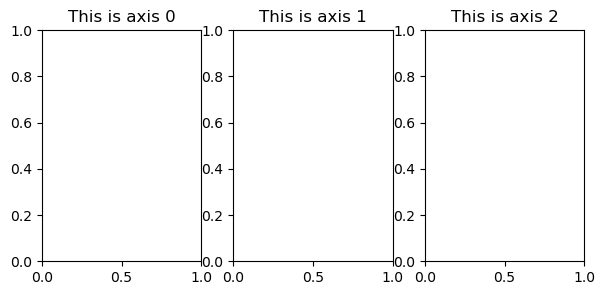

In [48]:
fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(7,3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

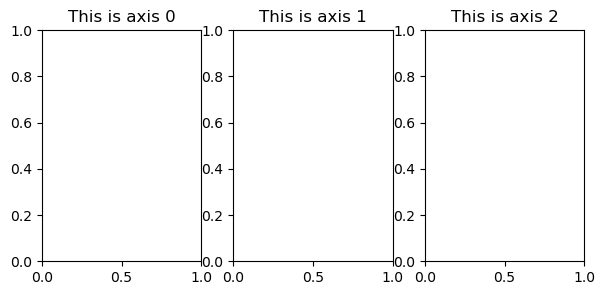

In [50]:
# Use zip to create the same subplots and avoid redundancy
fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(7,3))

for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f'This is axis {i}')

plt.show()

## Exercise
1. Select the power plants in California in a variable named ca_power_plants.

2. Create a list named top_sources with California’s top 3 electric primary sources.

3. Isolate the California state boundary in a variable named ca_boundary.


In [79]:
# Subset for California power plants
ca_power_plants = power_plants[power_plants['state']== 'California'].copy()
ca_power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)
38,11608,72,Venice Hydro,12397,Metropolitan Water District of S CA,Electric Utility,3815 Sepulveda Blvd,Culver City,Los Angeles,California,90230.0,hydroelectric,Hydroelectric = 10.1 MW,Conventional Hydroelectric,10.1,10.1,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-118.416800,34.011350,POINT (-118.41680 34.01135)
54,11624,104,J S Eastwood,17609,Southern California Edison Co,Electric Utility,Hwy 168 Sierra National Forest,Shaver Lake,Fresno,California,93664.0,pumped storage,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,199.8,199.8,NaN,NaN,NaN,NaN,NaN,199.8,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-119.256700,37.147926,POINT (-119.25670 37.14793)
74,11644,151,McClure,12745,Modesto Irrigation District,Electric Utility,639 S. McClure Rd.,Modesto,Stanislaus,California,95354.0,natural gas,"Natural Gas = 53.5 MW, Petroleum = 53.5 MW",Natural Gas Fired Combustion Turbine; Petroleu...,142.4,107.0,NaN,NaN,NaN,NaN,NaN,NaN,53.5,NaN,53.5,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.931390,37.629360,POINT (-120.93139 37.62936)
80,11650,161,Turlock Lake,19281,Turlock Irrigation District,Electric Utility,21642 Davis Road,Hickman,Stanislaus,California,95323.0,hydroelectric,Hydroelectric = 3.3 MW,Conventional Hydroelectric,3.3,3.3,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.594678,37.611461,POINT (-120.59468 37.61146)


In [73]:
top_sources = ca_power_plants.groupby('primsource').sum('total_mw').sort_values(by = 'total_mw')
top_sources = top_sources[top_sources.index.isin(['solar', 'natural gas', 'hydroelectric'])]
top_sources

,zip,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,crude_mw,solar_mw,wind_mw,other_mw,period,longitude,latitude
primsource,,,,,,,,,,,,,,,,,
hydroelectric,23076896.0,10234.5,10481.4,0.0,0.0,0.0,0.0,10144.2,337.2,0.0,0.0,0.0,0.0,0.0,49362420.0,-29298.599787,9237.345623
solar,71055138.0,19476.3,19338.5,1681.7,3.9,0.0,0.0,0.0,0.0,4.0,0.0,17648.9,0.0,0.0,154965630.0,-91031.515322,27169.753678
natural gas,30578231.0,41821.6,37891.6,462.2,0.6,0.0,0.0,0.0,0.0,37304.5,78.3,8.1,0.0,37.9,66356040.0,-39231.211211,11690.747963


# Zac's solution

In [96]:
# Subset for California power plants
ca_power_plants = power_plants[power_plants['state']== 'California'].copy()

In [97]:
top_sources = ['solar', 'natural gas', 'hydroelectric']

In [98]:
ca_boundary = states[states['name'] == 'California']

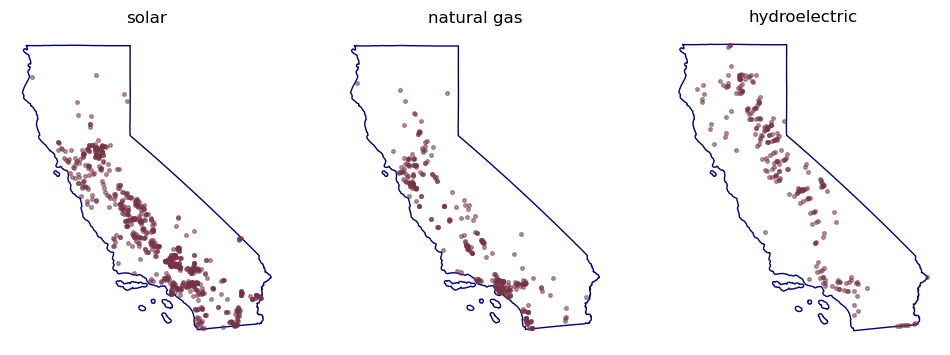

In [99]:
fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for ax, i in zip(ax, top_sources):
    ax.set_title(i)
    ax.axis('off')

    ca_boundary.plot(ax=ax,
                     color = 'none',
                     edgecolor= 'navy')
    ca_power_plants[ca_power_plants['primsource'] == i].plot(ax = ax,
                                                             color = '#773344',
                                                             alpha = 0.5,
                                                             markersize = 7)
